In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 운영체제에 따라 폰트 설정
if platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:  # Linux (Ubuntu 등)
    plt.rc('font', family='NanumGothic')  # 먼저 설치 필요

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 베르누이 분포
- 정의 : 시행이 1회 (단일 시행) 성공(1) 또는 실패(0) 중 하나의 결과만 발생하는 이산 확률 분포
- 확률값 표현 : PMF (확률 질량 함수)
  + P(X=1) = p (성공 확률)
  + P(X=0) = 1-p (실패 확률)
  + 기대값(평균) : E[X] = p
  + 분산 VAR(X) : p(1-p)
- 활용 사례
  + 품질 검사 (합격/불합격)
  + 이메일 분류(스팸/정상)
  + 광고 클릭 여부
  + 이진 결과를 갖는 상황에서 모두 사용

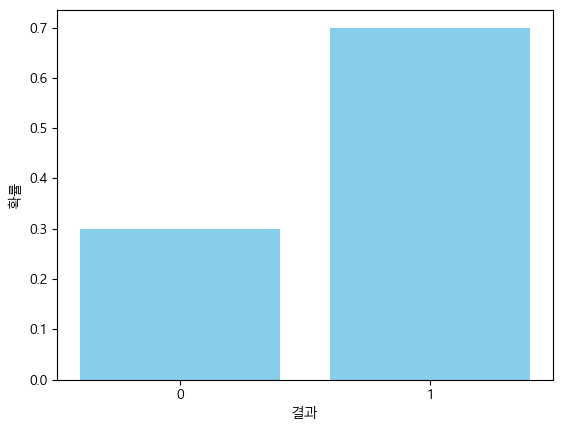

In [2]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

# 성공 확률 설정
p = 0.7
rv = bernoulli(p)               # 모델 인스턴스화

# 확률 질량 함수 (PMF) 시각화
x = [0, 1]
pmf = rv.pmf(x)                 # 모델링 

# 결과 시각화                    # 해석
fig, ax = plt.subplots()
ax.bar(x, pmf, color = 'skyblue')
ax.set_xticks(x)
ax.set_xlabel('결과')
ax.set_ylabel('확률')
plt.show()

## 베르누이 분포 예제
- 특정 광고의 클릭 확률이 10%일 때, 1000명의 사용자가 광고를 본다면 실제 클릭 수는 얼마나 될까?

In [3]:
from scipy.stats import bernoulli
p = 0.002
rv = bernoulli(p)
print('클릭(성공) 확률:', rv.pmf(1))
print('미클릭(실패) 확률:', rv.pmf(0))

클릭(성공) 확률: 0.002
미클릭(실패) 확률: 0.9979999999999996


# 이항분포
- 정의 : 베르누이 분포의 연장선에 있다.
  + 동일한 확률 p를 가지는 베르누이 시행을 n번 반복했을 때, 성공한 횟수를 따르는 분포
- 조건
  + 각 시행은 오직 성공(1) 또는 실패(0) 중 하나의 결과만 가진다. 
  + 시행은 서로 독립적이다.
  + 성공 확률 p는 매 시행마다 일정하다
  + 시행 횟수 n은 고정되어 있다.
- n (시도), p(성공 확률)
    + 기대값 : np
    + 분산 : np(1-p)

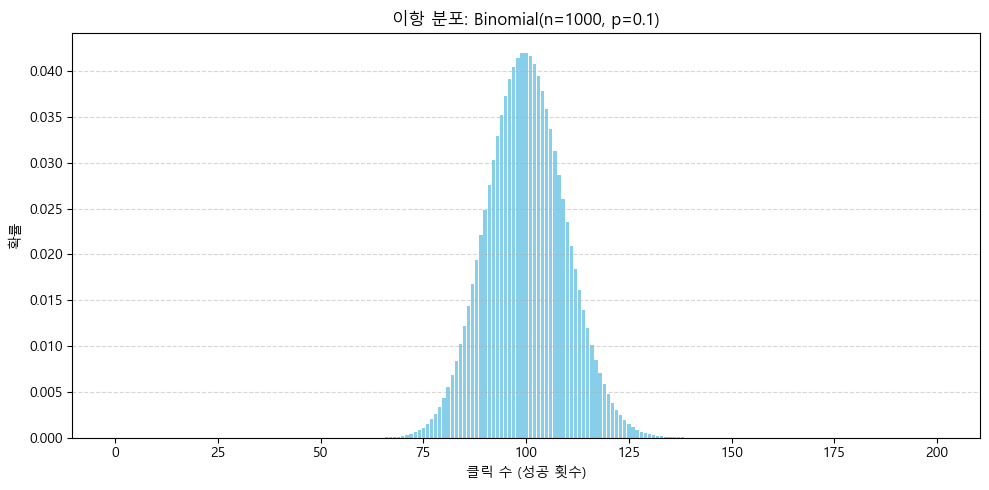

In [4]:
# 광고를 본 사용자 수 n = 1000
# 클릭 확률 p = 0.1, X∼Binomial(1000,0.1)
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import binom

# 파라미터 설정
n = 1000                # 시행 횟수
p = 0.1                 # 성공 확률
x = np.arange(0, 201)   # 가능한 클릭 성공 횟수 범위

# 이항 분포 객체 생성    # 모델링
bi_dist = binom(n, p)    

# 확률 질량 함수 PMF
pmf = bi_dist.pmf(x)

# 시각화 (객체지향 방식)
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, pmf, color='skyblue')
ax.set_title(f'이항 분포: Binomial(n={n}, p={p})')
ax.set_xlabel('클릭 수 (성공 횟수)')
ax.set_ylabel('확률')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 이항분포 예제1
- 시나리오
  + 유권자의 50%가 특정 후보를 지지한다고 알려져 있음
  + 질문 : 30명을 무작위로 뽑아 설문할 때, 지지 응답자가 몇 명일까?
- 기대값, 분산, 표준편차
  + 기대값(np) : 30 * 0.5, 15
  + 분산 np(1-p) : 30 * 0.5 * 0.5, 7.5
  + 표준편차 : 2.73

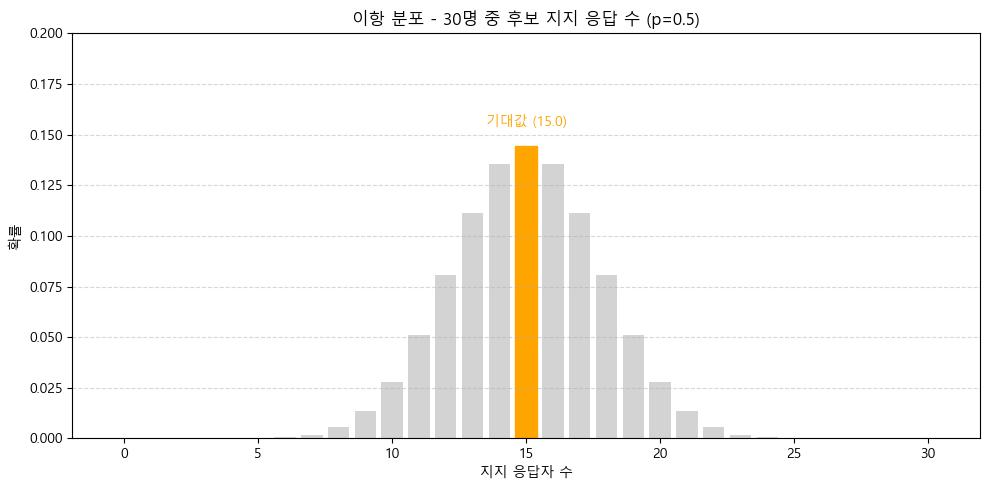

기대값 (E[X]) = 15.0
표준편차 (SD) ≈ 2.74


In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import binom

# 파라미터 설정
# 데이터
n = 30                # 시행 횟수
p = 0.5                # 성공 확률
x = np.arange(0, n + 1)   # 가능한 클릭 성공 횟수 범위

# 모델
bi_dist = binom(n, p)

# 시뮬레이션
pmf = bi_dist.pmf(x)

# 시각화
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(x, pmf, color='lightgray')
bars[15].set_color('orange')  # 기대값 위치 강조

ax.set_title('이항 분포 - 30명 중 후보 지지 응답 수 (p=0.5)')
ax.set_xlabel('지지 응답자 수')
ax.set_ylabel('확률')
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.text(15, pmf[15] + 0.01, f'기대값 ({n * p})', ha='center', color='orange')
ax.set_ylim(0, 0.20) # 확인

plt.tight_layout()
plt.show()

# 기대값, 표준편차 출력
print(f"기대값 (E[X]) = {n * p}")
print(f"표준편차 (SD) ≈ {np.sqrt(n * p * (1 - p)):.2f}")


## 이항분포 예제2
### 품질 관리
- 시나리오 : 생산된 100개의 부품 중 5개가 불량일 확률
- 한 제조 공장에서 생산되는 제품의 **불량률은 5%**로 알려져 있다. 하루 동안 생산된 제품 100개 중에서 불량품이 나올 확률을 조사하고자 한다.
- 질문
    + 불량품이 정확히 5개일 확률은 얼마인가?
    + 불량품이 10개 이상 나올 확률은? HINT : cdf() 활용
    + 이 분포를 시각화하라 (막대그래프)
- X∼Binomial(100,0.05)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# 모델 파라미터 설정
n = 100         # 제품 수
p = 0.05        # 불량 확률
x = np.arange(0, 20)  # 관심 있는 불량품 개수 범위

# 모델 생성 및 시뮬레이션
binom_dist = binom(n, p)
pmf = binom_dist.pmf(x)

# 확률 계산
prob_5 = binom_dist.pmf(5)           # 정확히 5개 불량
prob_10_or_more = 1 - binom_dist.cdf(9)  # 10개 이상 불량

print(f"정확히 5개가 불량일 확률: {prob_5:.4f}")
print(f"불량품이 10개 이상일 확률: {prob_10_or_more:.4f}")

정확히 5개가 불량일 확률: 0.1800
불량품이 10개 이상일 확률: 0.0282


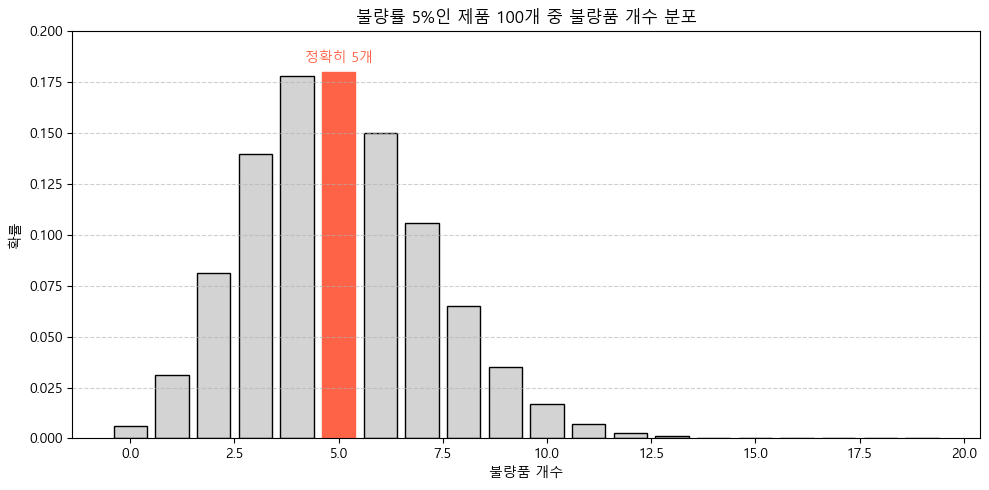

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(x, pmf, color='lightgray', edgecolor='black')
bars[5].set_color('tomato')  # 5개일 확률 강조

ax.set_title('불량률 5%인 제품 100개 중 불량품 개수 분포')
ax.set_xlabel('불량품 개수')
ax.set_ylabel('확률')
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.text(5, pmf[5] + 0.005, '정확히 5개', ha='center', color='tomato')
ax.set_ylim(0, 0.20)

plt.tight_layout()
plt.show()

## 이항분포 예제3
### 시나리오
- 로또 1등 확률 기반 이항분포를 만들어보세요! (1년)
    + 0회 당첨 확률
    + 1회 당첨 확률
    + 2회 당첨 확률
    + 3회 당첨 확률

0회 당첨 확률: 0.9993617799
1회 당첨 확률: 0.0006380164
2회 당첨 확률: 0.0000002036
3회 당첨 확률: 0.0000000000


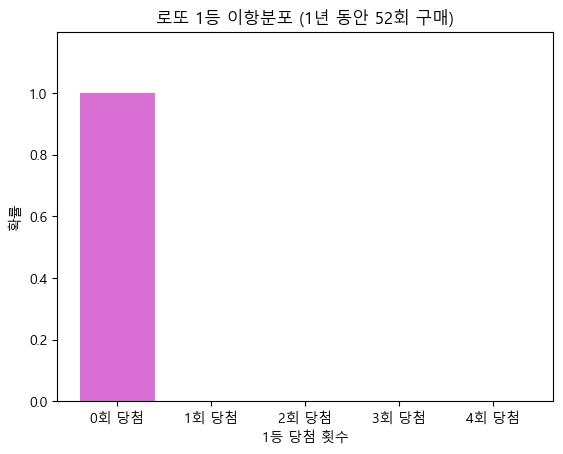

In [8]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

# 로또 파라미터
n = 5200
p = 1 / 8_145_060

# 이항 분포 모델
dist = binom(n=n, p=p)
x = np.arange(0, 5)  # 0 ~ 4회 당첨
pmf = dist.pmf(x)

# x축 레이블 생성
labels = [f"{i}회 당첨" for i in x]

# 시각화
fig, ax = plt.subplots()
bars = ax.bar(x, pmf, color='orchid')
ax.set_title('로또 1등 이항분포 (1년 동안 52회 구매)')
ax.set_xlabel('1등 당첨 횟수')
ax.set_ylabel('확률')
ax.set_ylim(0, max(pmf) * 1.2)
ax.set_xticks(x)
ax.set_xticklabels(labels)

# 확률 출력
print(f"0회 당첨 확률: {pmf[0]:.10f}")
print(f"1회 당첨 확률: {pmf[1]:.10f}")
print(f"2회 당첨 확률: {pmf[2]:.10f}")
print(f"3회 당첨 확률: {pmf[3]:.10f}")

##  중심극한정리 CTL
- N이 충분히 크면, 이항분포도 정규분포에 근사한다.
- 이항분포에 한정) 정규분포 근사 조건
  + np >= 5 AND n(1-p) >= 5
- 정규분포에 근사한다는 말
  + 성공과 실패와 관련된 실험을 많이 하면 할수록 ==> 정규분포처럼 계산해도 됨

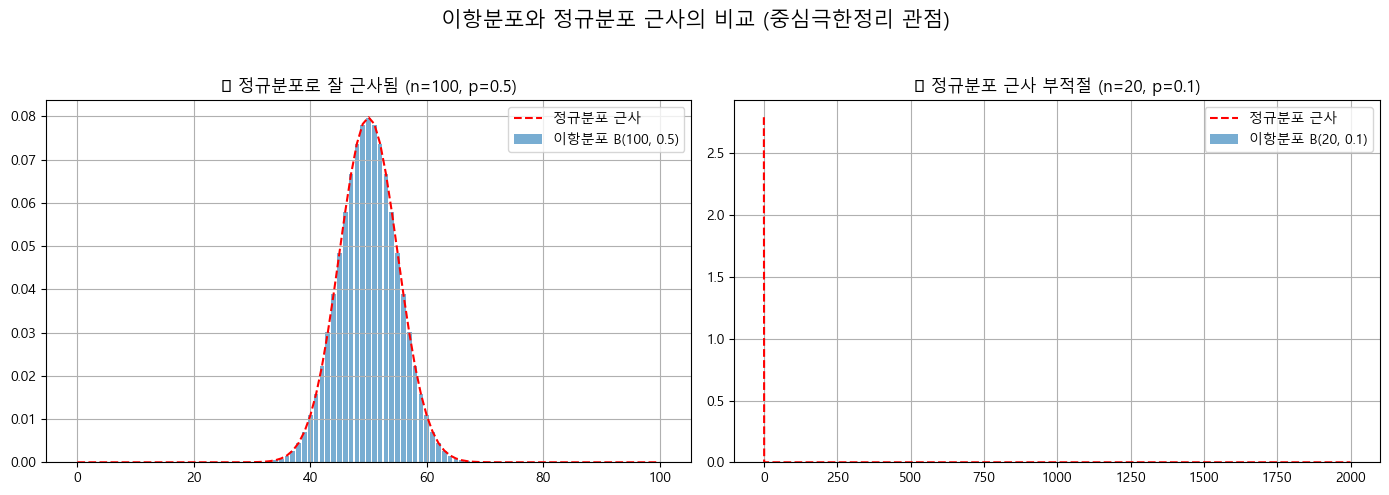

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# (정규 근사 가능) n=100, p=0.5
n1, p1 = 100, 0.5
mu1 = n1 * p1
sigma1 = np.sqrt(n1 * p1 * (1 - p1))
x1 = np.arange(0, n1 + 1)
binom_pmf1 = binom.pmf(x1, n1, p1)
norm_pdf1 = norm.pdf(x1, mu1, sigma1)

# (정규 근사 부적절) n=20, p=0.1 # 여기 숫자 변경하기
n2, p2 = 2000, 0.00001
mu2 = n2 * p2
sigma2 = np.sqrt(n2 * p2 * (1 - p2))
x2 = np.arange(0, n2 + 1)
binom_pmf2 = binom.pmf(x2, n2, p2)
norm_pdf2 = norm.pdf(x2, mu2, sigma2)

# 왼쪽: 정규 근사 적합
axes[0].bar(x1, binom_pmf1, alpha=0.6, label='이항분포 B(100, 0.5)')
axes[0].plot(x1, norm_pdf1, 'r--', label='정규분포 근사')
axes[0].set_title('✔ 정규분포로 잘 근사됨 (n=100, p=0.5)')
axes[0].legend()
axes[0].grid(True)

# 오른쪽: 정규 근사 부적절
axes[1].bar(x2, binom_pmf2, alpha=0.6, label='이항분포 B(20, 0.1)')
axes[1].plot(x2, norm_pdf2, 'r--', label='정규분포 근사')
axes[1].set_title('✖ 정규분포 근사 부적절 (n=20, p=0.1)')
axes[1].legend()
axes[1].grid(True)

fig.suptitle('이항분포와 정규분포 근사의 비교 (중심극한정리 관점)', fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 포아송 분포
- 어떤 사건이 일정하게 평균 속도로, 독립적으로 발생할 때 그 횟수를 나타내는 분포
- 예시
  + 1시간 동안 콜센터에 걸려오는 전화 수
  + 1km 구간에서 발생하는 교통 사고 수
  + 1분간 웹사이트에 접속하는 사용자 수
- 확률 질량 함수 (PMF)
$$
P(X = k) = \frac{e^{-\lambda} \cdot \lambda^k}{k!}
$$ 
- 용어
    + $X$ : 단위 시간(혹은 공간) 내 발생한 사건 수 (0, 1, 2, …)
    + $\lambda$ : 평균 발생 횟수
    + $k$ : 실제 관측된 횟수
    + $e$ : 자연상수 $e \approx 2.718$

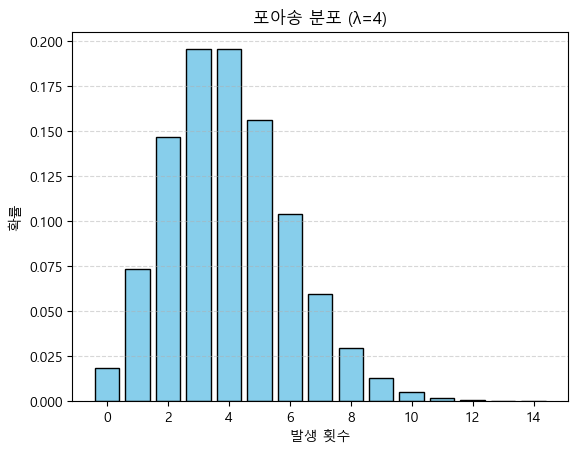

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 평균 발생 횟수 설정
lmbda = 4
x = np.arange(0, 15) # 구간, 시간, 공간

# 모델링
pmf = poisson.pmf(x, lmbda)

# 시각화
fig, ax = plt.subplots()
ax.bar(x, pmf, color='skyblue', edgecolor='black')
ax.set_title(f'포아송 분포 (λ={lmbda})')
ax.set_xlabel('발생 횟수')
ax.set_ylabel('확률')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

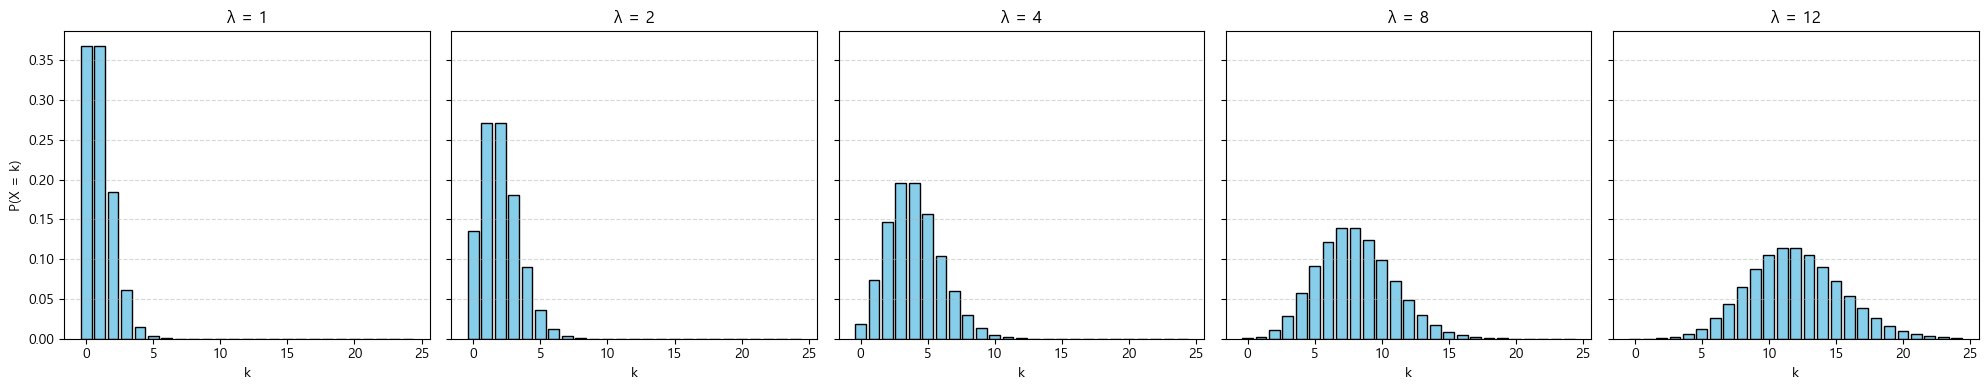

In [11]:
# lambda 값에 따라 포아송 분포 변화
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 1행 5열 정적 비교 그래프 (λ 값에 따른 포아송 분포 변화)
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
lambdas = [1, 2, 4, 8, 12]
x = np.arange(0, 25)

for ax, lmbda in zip(axes, lambdas):
    pmf = poisson.pmf(x, mu=lmbda)
    ax.bar(x, pmf, color='skyblue', edgecolor='black')
    ax.set_title(f'λ = {lmbda}')
    ax.set_xlabel('k')
    ax.grid(axis='y', linestyle='--', alpha=0.5)

axes[0].set_ylabel('P(X = k)')
plt.tight_layout()
plt.show()

## 포아송 분포의 특징
- 평균(기대값E[X]) = λ, 분산 Var[X] = λ
- λ가 커질수록 기대값도 커지고, 분산도 커짐
- 중심극한정리
  + 사건의 수(횟수)가 커지면 커질수록, 이산 확률 분포(포아송분포)는 정규분포에 수렴하더라. (근사한다!)

## 포아송 분포 예제
### 시나리오
- 웹 서버는 초당 평균 50건의 요청을 받는다.
- 이 시간 동안 들어오는 요청은 서로 독립적이고, 요청률은 일정하다고 가정한다.
- 다음 1초 동안 요청이 들어올 횟수 X는 어떤 분포를 그려질까? (시각화)
- 예상질문
  + 정확히 50건이 올 확률은?
  + 60건 이상 들어올 올 확률은?
- 웹사이트 구축 시나리오 (추후 적용 할 수 있지 않을까?)
  + 포아송 분포를 기반으로 해서, 특정 시점이 넘어가면 나한테 메일 발송해서, 대응 빨리|하세용!

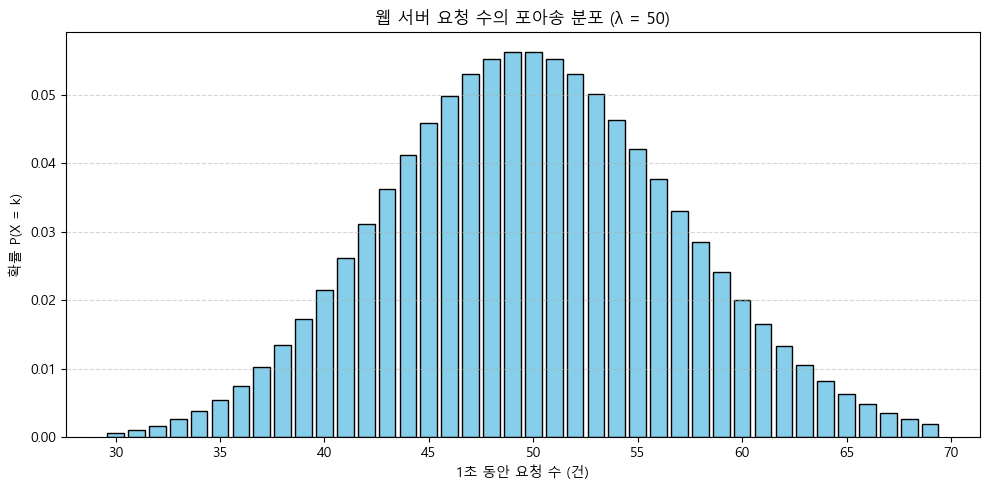

In [18]:
# 1초 동안 요청 수 분포 시각화
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 평균 요청 수
lmbda = 50
x = np.arange(30, 70)

# 확률 질량 함수(PMF)
pmf = poisson.pmf(x, mu=lmbda)

# 시각화
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, pmf, color='skyblue', edgecolor='black')
ax.set_title(f'웹 서버 요청 수의 포아송 분포 (λ = {lmbda})')
ax.set_xlabel('1초 동안 요청 수 (건)')
ax.set_ylabel('확률 P(X = k)')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [19]:
# 2. 확률 계산
# 정확히 50건 올 확률
prob_50 = poisson.pmf(50, mu=lmbda)
print(f"정확히 50건이 들어올 확률: {prob_50:.4f}")

# 60건 이상 들어올 확률
prob_over_60 = 1 - poisson.cdf(59, mu=lmbda)
print(f"60건 이상 들어올 확률: {prob_over_60:.4f}")


정확히 50건이 들어올 확률: 0.0563
60건 이상 들어올 확률: 0.0923


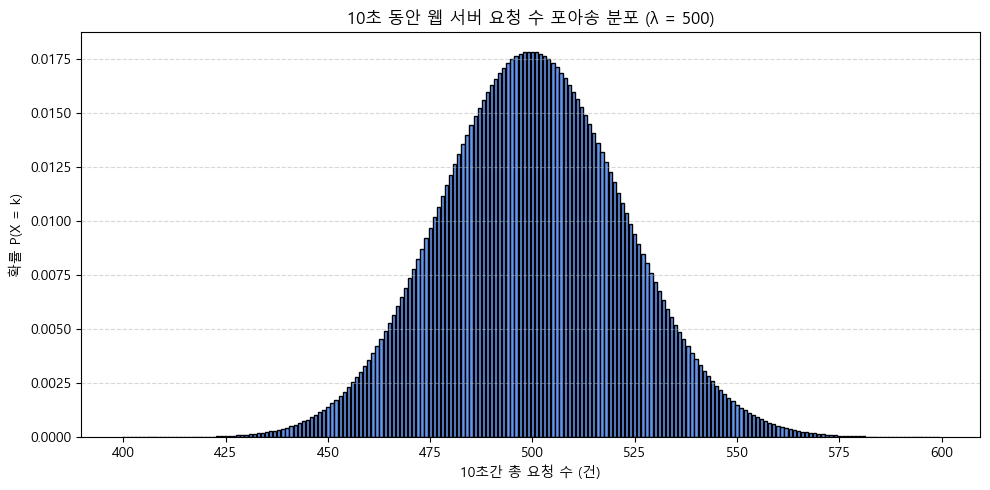

정확히 500건 확률: 0.0178
550건 이상 확률: 0.0144


In [22]:
# 3. 10초 동안 누적 요청 수 분석
lambda_per_sec = 50
total_lambda = lambda_per_sec * 10

x = np.arange(400, 600)
pmf = poisson.pmf(x, mu=total_lambda)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, pmf, color='cornflowerblue', edgecolor='black')
ax.set_title(f'10초 동안 웹 서버 요청 수 포아송 분포 (λ = {total_lambda})')
ax.set_xlabel('10초간 총 요청 수 (건)')
ax.set_ylabel('확률 P(X = k)')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 확률 계산 예시
prob_500 = poisson.pmf(500, mu=total_lambda)
prob_over_550 = 1 - poisson.cdf(549, mu=total_lambda)

print(f"정확히 500건 확률: {prob_500:.4f}")
print(f"550건 이상 확률: {prob_over_550:.4f}")


In [23]:
# 4. 실전 응용 - 서버 자동 경고 임계치 설정
from scipy.stats import poisson

lambda_total = 500  # 평균값(예: 10초간 500건)
threshold_prob = 0.01  # 경고 기준: 상위 1%

# 임계 요청 수 계산
k = poisson.isf(threshold_prob, mu=lambda_total)
print(f"경고 임계 요청 수: {int(k)}건 이상이면 개발자에게 알림")


경고 임계 요청 수: 553건 이상이면 개발자에게 알림


# 기하분포
- 성공할 때까지 실패한 횟수를 모델링하는 분포
- 베르누이 개념 포함
  + 성공확률 p, 실패할 확률 (1-p)
- 실생활 예시
  + 광고 전화 연결이 성공하기까지 걸린 콜 횟수
  + 웹 마케팅 광고 클릭이 처음 발생하기까지의 사용자 수

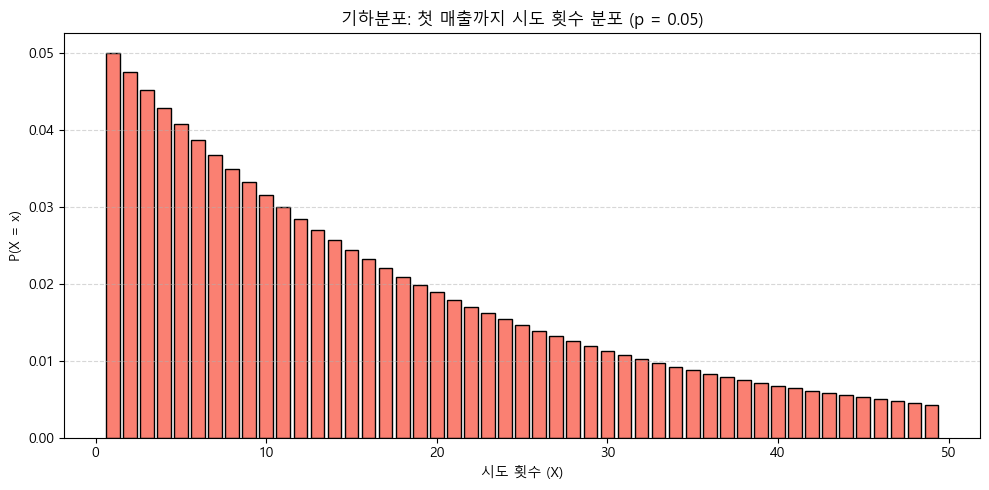

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# 매출 발생 확률 p
p = 0.05    # 5%의 구매 전환율
x = np.arange(1, 50)      # 시도 횟수
pmf = geom.pmf(x, p)

# 시각화 (객체지향 방식)
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, pmf, color='salmon', edgecolor='black')
ax.set_title('기하분포: 첫 매출까지 시도 횟수 분포 (p = 0.05)')
ax.set_xlabel('시도 횟수 (X)')
ax.set_ylabel('P(X = x)')
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 기하분포 예제
### 시나리오
- 마케팅 전환 모델
- 시도 횟수 + 광고 단가 + 목표 매출액을 결합하여 예상 마케팅 비용 추정 모델 개발
- 시나리오
  + 광고 전환 시도 수 모델링 : 기하분포
  + 광고 1회 단가 : 예산 변수
  + 목표 매출액 설정 : 원하는 기준
  + => 총 필요 광고 클릭 수 => 총 마케팅 비용 도출 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom

# 설정 값
p = 0.05                       # 전환율 (5%)
ad_cost_per_click = 200        # 클릭당 광고비(원)
unit_price = 20000             # 제품 가격(원)
target_sales_amount = 2000000  # 목표 매출(원)

# 1. 한 명의 구매자까지 평균 시도(클릭) 횟수
expected_trials_per_sale = 1 / p   # 기하분포 기대값

# 2. 목표 매출을 위한 총 구매자 수
required_sales = target_sales_amount / unit_price

# 3. 총 필요 클릭 수(기대값)
expected_total_clicks = required_sales * expected_trials_per_sale

# 4. 총 예상 광고비
expected_total_cost = expected_total_clicks * ad_cost_per_click

# 결과 출력
print(f"목표 매출액: {target_sales_amount:,.0f}원")
print(f"필요한 구매 수: {required_sales:.0f}명")
print(f"기대 클릭 수 (기하분포 기반): {expected_total_clicks:.0f}회")
print(f"예상 마케팅 비용: {expected_total_cost:,.0f}원")

목표 매출액: 2,000,000원
필요한 구매 수: 100명
기대 클릭 수 (기하분포 기반): 2000회
예상 마케팅 비용: 400,000원


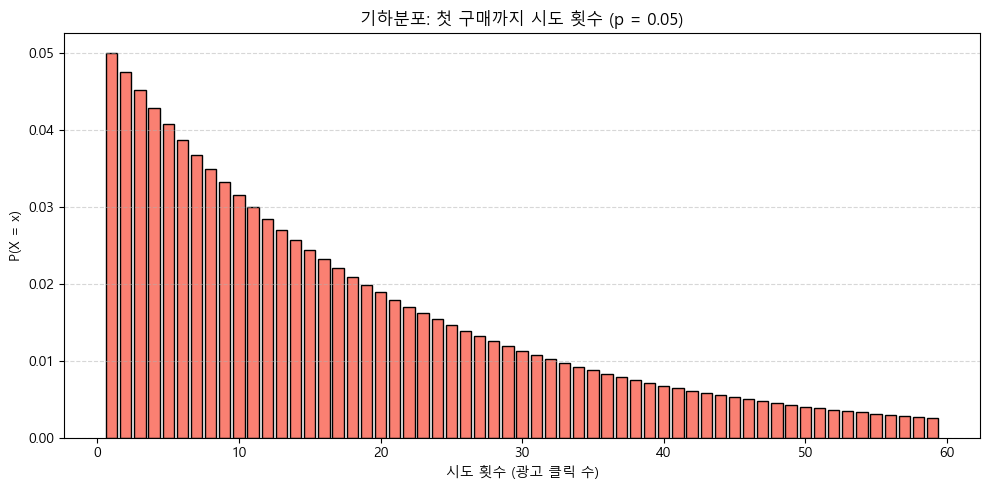

In [27]:
x = np.arange(1, 60)
pmf = geom.pmf(x, p)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, pmf, color='salmon', edgecolor='black')
ax.set_title(f'기하분포: 첫 구매까지 시도 횟수 (p = {p})')
ax.set_xlabel('시도 횟수 (광고 클릭 수)')
ax.set_ylabel('P(X = x)')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
